In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matlab.engine
m = matlab.engine.connect_matlab('RLengine')

In [4]:
t_pause = 0.001 #This needs to match the simulation pausing block parameter


In [ ]:
m.workspace['y'] = 2
m.load_system(m.workspace['mdl'])
m.load_system("pmic_simulink_rt")
m.workspace['out'] = m.sim(m.workspace['mdl'])

In [5]:
def update_control(mainPWM, PWM1, PWM2, PWM3):
    freq = m.workspace['f']
    #Main PWM
    delay_main = mainPWM / freq
    m.set_param(m.workspace['var_D_main'],'Value',str(mainPWM), nargout=0)
    m.set_param(m.workspace['var_D_main_n'],'Value',str(1-mainPWM), nargout=0)
    m.set_param(m.workspace['var_D_main_PWM'],'Tdelay',str(0), nargout=0)
    m.set_param(m.workspace['var_D_main_n_PWM'],'Tdelay',str(delay_main), nargout=0)

    delay_PWM1 = 0
    delay_PWM2 = PWM1 / freq
    delay_PWM3 = (PWM1+PWM2) / freq
    #PWM
    m.set_param(m.workspace['var_D_si_1'],'Value',str(PWM1), nargout=0)
    m.set_param(m.workspace['var_D_si_2'],'Value',str(PWM2), nargout=0)
    m.set_param(m.workspace['var_D_si_3'],'Value',str(PWM3), nargout=0)
    #Delay
    m.set_param(m.workspace['var_D_si_1_PWM'],'Tdelay',str(delay_PWM1), nargout=0)
    m.set_param(m.workspace['var_D_si_2_PWM'],'Tdelay',str(delay_PWM2), nargout=0)
    m.set_param(m.workspace['var_D_si_3_PWM'],'Tdelay',str(delay_PWM3), nargout=0)

def update_load(load1, load2, load3):
    m.set_param(m.res_1,'Value',str(load1))
    m.set_param(m.res_2,'Value',str(load2))
    m.set_param(m.res_3,'Value',str(load3))

In [6]:
m.set_param(m.workspace['mdl'],'SimulationCommand','stop',nargout=0)
m.set_param(m.workspace['mdl'],'SimulationCommand','start',nargout=0)
m.set_param(m.workspace['mdl'],'SimulationCommand','continue',nargout=0)


In [25]:
stop = 0
mainPWM = 0.5
PWM1 = 0.3
PWM2 = 0.4
PWM3 = 0.5
while (stop!=1):
    #Ask controller to do something when it is the time
    if (m.eval("out.tout")[-1][0] % t_pause == 0):
        if m.eval("out.tout")[-1][0] > 1:
            break
        update_control(mainPWM, PWM1, PWM2, PWM3)
        m.set_param(m.workspace['mdl'],'SimulationCommand','continue',nargout=0)

EngineError: MATLAB function cannot be evaluated

In [ ]:
m.set_param(m.workspace['mdl'],'SimulationCommand','start',nargout=0)
time.sleep(10)
m.set_param(m.workspace['mdl'],'SimulationCommand','continue',nargout=0)
stop = 0
while (stop==0):
    time.sleep(10)
    y1 = np.array(m.eval("out.yout{1}.Values.Data"))[0,0,:]
    y2 = np.array(m.eval("out.yout{2}.Values.Data"))[0,0,:]
    y3 = np.array(m.eval("out.yout{3}.Values.Data"))[0,0,:]
    print(y1.shape)
    plt.plot(y1)
    plt.plot(y2)
    plt.plot(y3)
    plt.legend([1,2,3])
    plt.show()
    m.set_param(m.workspace['mdl'],'SimulationCommand','continue',nargout=0)

    #time.sleep(5)

In [28]:
dataXport = out.testvariable.Data;
m.set_param(m.workspace['mdl'],'SimulationCommand','stop')

(357227,)


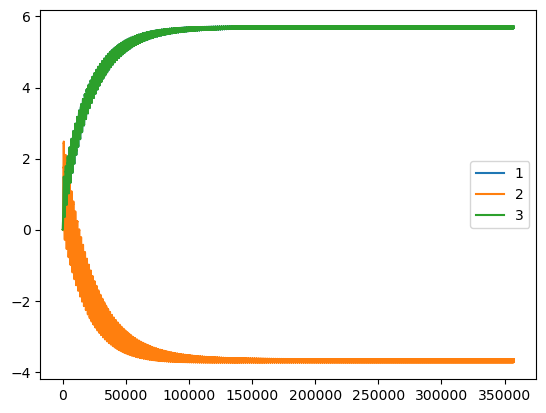

In [93]:
#str(0.5)
#out = m.workspace['out']
#yout = m.get(out, 'yout')
y1 = np.array(m.eval("out.yout{1}.Values.Data"))[0,0,:]
y2 = np.array(m.eval("out.yout{2}.Values.Data"))[0,0,:]
y3 = np.array(m.eval("out.yout{3}.Values.Data"))[0,0,:]
print(y1.shape)
plt.plot(y1)
plt.plot(y2)
plt.plot(y3)
plt.legend([1,2,3])
plt.show()
#a = m.get(out, '{1}')
#.yout{1}.V0alues.Data

In [7]:
m.quit()
